In [8]:
# LIBRARIES                         
import pandas as pd
import numpy as np

import collections
import math

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


#Machine learning algorithms libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
class datasetAnalysis:

    
    def __init__(self,data,target):
        self.data=data
        self.target=target

#main informations        
    def datasetInfo1(self):
        
        print( '\033[1m'+ "\n Shape of Dataset :" + '\033[0m',self.data.shape)
        print(self.data.info())
#         print(self.data.describe())
        with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
            display(self.data.describe());
            print( '\033[1m'+ "\n General Information of Dataset\n" + '\033[0m')
            display(self.data.head());
#         print( '\033[1m'+ "\n General Information of Dataset\n" + '\033[0m',self.data.head())
        print('\033[1m'+ " \n Showing Missing Values\n" + '\033[0m')
        print(self.data.isnull().sum())

            
        
    def datasetInfo2(self):
        num_col=[]
        cat_col=[]
        print(self.data.columns)
        for col in list(self.data.columns):
            
            if (self.data[col].dtypes != 'object'):
                num_col.append(col)
                
            else:
                cat_col.append(col)
                
        print("\n" , '\033[1m'+ "Numeric Columns\n" + '\033[0m', num_col) 
        print("\n" , '\033[1m'+ "Categorical Columns\n" + '\033[0m', cat_col)

        print("\n" , '\033[1m'+ "Target Counts\n" + '\033[0m', self.data[target].value_counts(),"\n")
        
        for i in self.data.columns:
            print(self.data[i].value_counts().head(7),"\n")


class PreVisulation:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    def __init__(self,data,feature):
#         self.data=data
#         self.target=target
        self.feature=feature
        self.data=data

    def vis1(self):
        
    #target distribution
        print(data[target].value_counts())
        sns.set(style="darkgrid")
        ax= sns.countplot(y="reason", hue=target, data=data)
        
#         data[target].value_counts().plot("barh")
    def vis2(self): 
        
        data[feature].plot.hist(bins = 20,figsize=(15,7.5))
        
        
        
    def vis3(self): 
        
        
        for i in range(len(self.data.dtypes)):

               
            
            if (self.data.dtypes[i] != "object" and self.data.iloc[:,i].notna().all()):

                f,axes = newplt.subplots(1,1)
                sns.distplot(self.data.iloc[:,i],kde_kws=dict(linewidth=5),bins = 20)
                
            elif (self.data.dtypes[i] == "object" and self.data.iloc[:,i].notna().all()):
                f,axes = newplt.subplots(1,1)
                sns.countplot(self.data.iloc[:,i],data=self.data)
        
        # Verinin boxplot gösterimi
        newplt.figure()
        sns.boxplot(data=self.data)
        

        

In [10]:

class preprocess():
    from sklearn.impute import SimpleImputer
    
    def __init__(self, data):
        self.data=data
    
    def missingvalues(self):
        # Imputation
#         if self.data.col.dtypes == 'object':
                        
#             self.data[col] = self.data[col].replace(np.nan, "Other")
#             print(self.data.isna().sum())
#         else:
        my_imputer = SimpleImputer()
        imputed_df2_dum = pd.DataFrame(my_imputer.fit_transform(self.data))
        imputed_df2_dum.columns = self.data.columns
        self.data=imputed_df2_dum.copy()
    
    def dummies(self):
    
        df_num = df.select_dtypes(exclude=[np.number])
        df_num.columns
        a=df_num.columns
        dff=self.data.copy()
    #     s = (df2.dtypes == 'object')
    #     object_cols = list(s[s].index)
        for i in a:
            if self.data[i].value_counts().count() <= 6:


                df2_dum = pd.get_dummies(self.data[i],columns= i, prefix= i) #prefix_sep = '_'
                print(list(df2_dum.columns))
                dff = pd.concat([dff, df2_dum], axis=1).drop(i,axis=1)
                print(list(dff.columns))
        self.data=dff.copy()        
        return self.data




In [11]:
class process():
    global train
    global test
    
    
    def __init__(self,X,y,size):
     
        self.size=size
        self.X=X
        self.y=y
    
    def split(self):
        
        # train-test spit
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=self.size,stratify=df[target],shuffle=True,random_state=42)#shuffle=False,
        

        print("\n", '\033[1m'+ " X_train,X_test Info" + '\033[0m')
        print(X_train.shape,X_test.shape)
        print("\n", '\033[1m'+ " X_train,y_test Info" + '\033[0m')
        print(y_train.shape,y_test.shape)
        return X_train, X_test, y_train, y_test
        



In [12]:
hmelq=pd.read_csv("hmelq.csv")
df=hmelq.copy()
df=df.dropna()
df.head()


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [22]:
target='bad'
data=datasetAnalysis(df,target)
data.datasetInfo1()




 Shape of Dataset : (2018, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB
None


,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000



 General Information of Dataset



,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


 
 Showing Missing Values

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64


In [8]:
data.datasetInfo2()

Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

 Numeric Columns
 ['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']

 Categorical Columns
 ['reason', 'job']

 Target Counts
 0    1840
1     178
Name: bad, dtype: int64 

0    1840
1     178
Name: bad, dtype: int64 

13900    18
11000    18
10600    18
12900    18
15200    18
12100    16
13700    16
Name: loan, dtype: int64 

69697.0     2
45279.0     2
206126.0    2
58606.0     2
62933.0     2
94727.0     2
95351.0     2
Name: mortdue, dtype: int64 

85424.0     2
98088.0     2
114494.0    2
116160.0    2
106233.0    2
57280.0     2
65481.0     2
Name: value, dtype: int64 

DebtCon    1428
HomeImp     590
Name: reason, dtype: int64 

Other     774
ProfEx    539
Office    348
Mgr       269
Self       58
Sales      30
Name: job, dtype: int64 

0.0    177
4.0    152
1.0    137
6.0    126
2.

# Converting categorical features to numerical features

In [16]:
dfImputer=preprocess(df)

aa=dfImputer.dummies()


['reason_DebtCon', 'reason_HomeImp']
['bad', 'loan', 'mortdue', 'value', 'job', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc', 'reason_DebtCon', 'reason_HomeImp']
['job_Mgr', 'job_Office', 'job_Other', 'job_ProfEx', 'job_Sales', 'job_Self']
['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc', 'reason_DebtCon', 'reason_HomeImp', 'job_Mgr', 'job_Office', 'job_Other', 'job_ProfEx', 'job_Sales', 'job_Self']


In [17]:
aa.columns

Index(['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage',
       'ninq', 'clno', 'debtinc', 'reason_DebtCon', 'reason_HomeImp',
       'job_Mgr', 'job_Office', 'job_Other', 'job_ProfEx', 'job_Sales',
       'job_Self'],
      dtype='object')

In [18]:
aa.reset_index(drop=True, inplace=True)

dff=aa.copy()

# STATISTIC

In [12]:
from scipy.stats import shapiro
from scipy.stats import levene
for col in dff.columns[1:]:           #bad hariç
        if dff[col].dtypes != object:

            stat, p = shapiro(dff[col])

            print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

            alpha = 0.05
            if p > alpha:
                print(col)
                print('\033[1m'+ col + '\033[0m','Normal dağılımdan gelmekte (Fail to Reject H0) \n')
            else:
                print('\033[1m'+ col + ":"+'\033[0m','Normal dağılımdan gelmemekte (reject H0)\n')

Shapiro Statistics=0.836, p=0.000
loan: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.862, p=0.000
mortdue: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.844, p=0.000
value: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.912, p=0.000
yoj: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.277, p=0.000
derog: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.380, p=0.000
delinq: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.905, p=0.000
clage: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.669, p=0.000
ninq: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.964, p=0.000
clno: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.824, p=0.000
debtinc: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.571, p=0.000
reason_DebtCon: Normal dağılımdan gelmemekte (reject H0)

Shapiro Statistics=0.571, p=0.000
reason_HomeImp: Normal dağılımdan gelmemekte

In [13]:
from scipy import stats

for col in dff.columns[1:]:           #bad hariç
    if dff[col].dtypes != object:
        
        p = stats.ks_2samp(dff[col][dff.bad == 0], dff[col][dff.bad == 1])[1]

        print('KS Testi  p=%.3f' % ( p))

        alpha = 0.05
        if p > alpha:
            print('\033[1m'+ col + '\033[0m','Normal dağılımdan gelmekte (Fail to Reject H0) \n')
        else:
            print('\033[1m'+ col + ":"+'\033[0m','Normal dağılımdan gelmemekte (reject H0)\n')


KS Testi  p=0.002
loan: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.005
mortdue: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.002
value: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.134
yoj Normal dağılımdan gelmekte (Fail to Reject H0) 

KS Testi  p=0.000
derog: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.000
delinq: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.000
clage: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.004
ninq: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=0.069
clno Normal dağılımdan gelmekte (Fail to Reject H0) 

KS Testi  p=0.000
debtinc: Normal dağılımdan gelmemekte (reject H0)

KS Testi  p=1.000
reason_DebtCon Normal dağılımdan gelmekte (Fail to Reject H0) 

KS Testi  p=1.000
reason_HomeImp Normal dağılımdan gelmekte (Fail to Reject H0) 

KS Testi  p=1.000
job_Mgr Normal dağılımdan gelmekte (Fail to Reject H0) 

KS Testi  p=0.717
job_Office Normal dağılımdan gelmekte (Fail to Reject H0) 

K

# LEVENE & Bagimsiz T-Test 

*verilerin bazıları normal dağılımdan gelmediği için normallik varsayımı olmadığında kullanılan levene testinı uyguladık
H0:İki grubun varyansları eşittir
H1:İki grup varyansları arasında farklılık vardır
# equal_var parametresi için hesaplanır.
    # p-value<Lambda ise büyükse equal_var=True, H0 reddedilir, 
    # iki grup varyansı arasında farklılık vardır, heterojen

In [14]:
# equal_var parametresi için hesaplanır.
# p-value>alfa ise büyükse equal_var=True, H0 reddedilir, 
# iki grup varyansı arasında farklılık vardır, heterojen
levene(dff['loan'][dff.bad == 0], dff['loan'][dff.bad == 1])

LeveneResult(statistic=2.3947745891982195, pvalue=0.12189825252399986)

In [15]:
for col in dff.columns[1:]:           #bad hariç
    if dff[col].dtypes != object:
        stat, p=levene(dff[col][dff.bad == 0], dff[col][dff.bad == 1])
        print('\033[1m'+ "\nLevene " + col+ '\033[0m'' Statistics=%.3f, p=%.3f' % (stat, p))
        if (levene(dff[col][dff.bad == 0], dff[col][dff.bad == 1])[1]) >alpha:
            
            p2=stats.ttest_ind(dff[col][dff.bad == 0], dff[col][dff.bad == 1],equal_var=True)[1]
            print('\033[1m'+ "*True Ttest  pvalue=%.3f "% (p2) + '\033[0m' )
            
        else:
            p2=stats.ttest_ind(dff[col][dff.bad == 0], dff[col][dff.bad == 1],equal_var=False)[1]
            print('\033[1m'+ "False Ttest  pvalue=%.3f "% (p2)  + '\033[0m',p2 )


Levene loan Statistics=2.395, p=0.122
*True Ttest  pvalue=0.240 

Levene mortdue Statistics=2.307, p=0.129
*True Ttest  pvalue=0.260 

Levene value Statistics=3.991, p=0.046
False Ttest  pvalue=0.263  0.2630653333585097

Levene yoj Statistics=4.210, p=0.040
False Ttest  pvalue=0.014  0.013849139501292912

Levene derog Statistics=118.586, p=0.000
False Ttest  pvalue=0.000  1.2121455847892433e-05

Levene delinq Statistics=172.844, p=0.000
False Ttest  pvalue=0.000  2.6388181386785144e-08

Levene clage Statistics=0.008, p=0.927
*True Ttest  pvalue=0.000 

Levene ninq Statistics=19.275, p=0.000
False Ttest  pvalue=0.000  0.00041337689944607396

Levene clno Statistics=9.247, p=0.002
False Ttest  pvalue=0.640  0.6404795826281852

Levene debtinc Statistics=115.704, p=0.000
False Ttest  pvalue=0.000  7.481950355766321e-08

Levene reason_DebtCon Statistics=0.114, p=0.736
*True Ttest  pvalue=0.736 

Levene reason_HomeImp Statistics=0.114, p=0.736
*True Ttest  pvalue=0.736 

Levene job_Mgr Stati

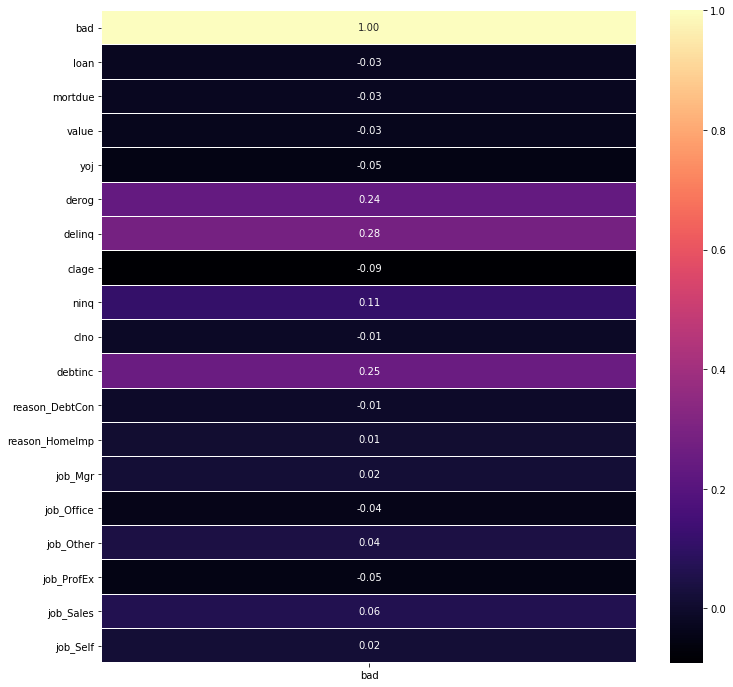

In [17]:
fig,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dff.corr().iloc[:,0:1], ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


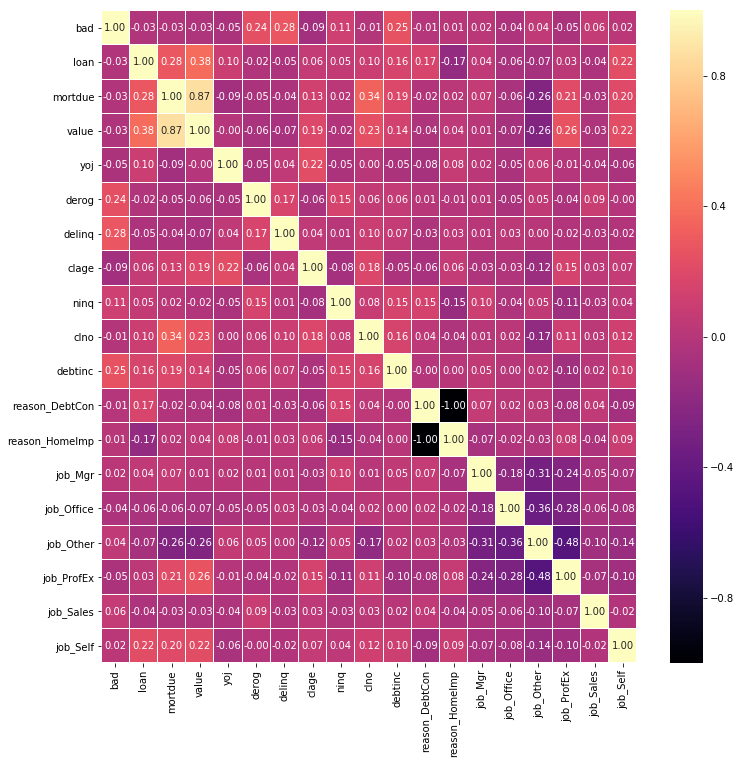

In [16]:
fig,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dff.corr().iloc[:,:], ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


# Split DataSet

In [19]:
y=dff["bad"].values
# y=y.iloc[:,3].values
X=dff.drop(["bad"], axis=1)
# from sklearn.preprocessing import LabelEncoder

# y = LabelEncoder().fit_transform(y)

In [20]:
splitSet=process(X,y,0.3)

In [23]:
X_train, X_test, y_train, y_test=splitSet.split()


  X_train,X_test Info
(1412, 18) (606, 18)

  X_train,y_test Info
(1412,) (606,)


In [22]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# ALGORITHMS

In [24]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix

def conf_mtrx(y_test, y_pred, model): 

    cm = confusion_matrix(y_test,y_pred)    
    f, ax = plt.subplots(figsize =(5,5))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot = True, linewidths=0.5, linecolor="red",fmt = ".0f",ax=ax)#,cmap=plt.cm.RdPu
    plt.xlabel("predicted y values")
    plt.ylabel("real y values")
    plt.title("\nConfusion Matrix")
    plt.show()
    

def rc_recis_scres(y_test, y_pred, algorithm_name):
    from sklearn.metrics import recall_score,precision_score,accuracy_score, f1_score

    rs=recall_score(y_test, y_pred) 
    ps=precision_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
#     print("Recall Test Score of ", algorithm_name, "    : ",rs)
#     print("Precision Test Score of ", algorithm_name, " : ",ps)
#     print("F1 Test Score of ", algorithm_name, "        : ",f1)
    print()
    
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, label = roc_auc_score) 
    plt.plot([0,1],ls='--')
    plt.plot([0,0],[1,0],c='.5')
    plt.plot([1,1],c='.5')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

    
def ML_Algorithms(X_train, X_test, y_train, y_test, alg_name, model):
    from sklearn.metrics import roc_auc_score,roc_curve

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    conf_mtrx(y_test, y_pred, model)
    print("*****",alg_name," ALGORITHM:") 
    rc_recis_scres(y_test, y_pred, alg_name)

    print("Score for ", alg_name," train set:"  ,  model.score(X_train,y_train))
    print("Score for ", alg_name, " test set: ", model.score(X_test,y_test))
    print("Accuracy Score for ", alg_name ,accuracy_score(y_test, y_pred))
    
    tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    y_probs = model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_probs > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    
    print()
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    plot_roc_curve(fpr, tpr)
    return model    
    

    
def tuning(model,params):
    
    cart_cv=GridSearchCV(model,params,cv=10,n_jobs=-1,verbose=2)
    cart_cv_model=cart_cv.fit(X_train,y_train)
    print('\033[1m'+ "En iyi parametreler: "'\033[0m'+str(cart_cv_model.best_params_))
    

# RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [ ]:
?rf_model


In [25]:
rf_params={"max_depth":[2,5,8,10,20,30],
          "max_features":[2,5,8],
          "n_estimators":[10,50,100],
          "min_samples_split":[5,10]}

In [28]:
rf_model=RandomForestClassifier().fit(X_train,y_train)


In [29]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9521452145214522

In [30]:
tuning(rf_model,rf_params)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   40.0s


En iyi parametreler: {'max_depth': 30, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   45.0s finished


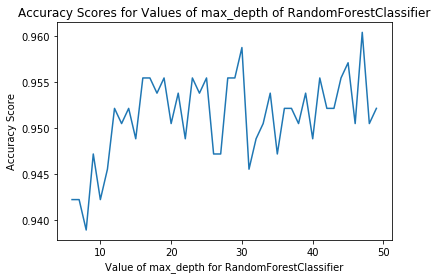

In [31]:
# experimenting with different n values
from sklearn import metrics

k_range = list(range(6,50))
scores = []
for k in k_range:
    knn = RandomForestClassifier(max_depth=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of max_depth for RandomForestClassifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of max_depth of RandomForestClassifier')
plt.show()

In [44]:
cart=RandomForestClassifier(max_depth=20,max_features=4,n_estimators=50,min_samples_split=5)
rf_tuned=cart.fit(X_train,y_train)

y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9471947194719472

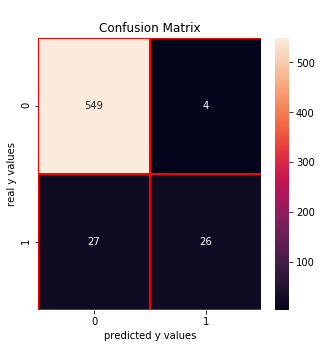

***** RANDOM FOREST CLASSIFIER  ALGORITHM:

Score for  RANDOM FOREST CLASSIFIER  train set: 0.96671388101983
Score for  RANDOM FOREST CLASSIFIER  test set:  0.9488448844884488
Accuracy Score for  RANDOM FOREST CLASSIFIER 0.9488448844884488

AUC: 0.92


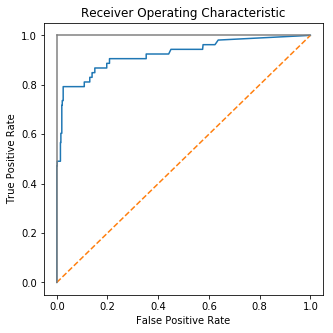

In [36]:
#RF for test1, non-feature extraction
rff_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "RANDOM FOREST CLASSIFIER", RandomForestClassifier(criterion='entropy', max_depth=20, max_features=3,n_estimators=10,min_samples_split=10, random_state=42))


In [45]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       553
           1       0.84      0.49      0.62        53

    accuracy                           0.95       606
   macro avg       0.90      0.74      0.80       606
weighted avg       0.94      0.95      0.94       606



Text(0.5, 0, 'Değişken Önem Düzeyleri')

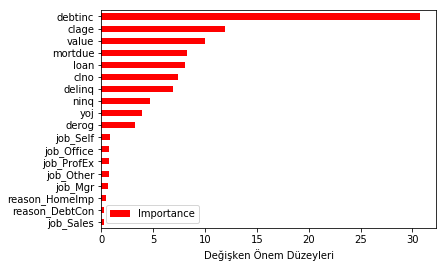

In [40]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                      axis=0,ascending=True).plot(kind="barh",color="r")
plt.xlabel("Değişken Önem Düzeyleri")

In [41]:
# X = X[["debtinc","clage","value","loan","delinq","ninq","yoj"]]

In [42]:
# splitSet=process(X,y,0.3)
# X_train, X_test, y_train, y_test=splitSet.split()


  X_train,X_test Info
(1412, 7) (606, 7)

  X_train,y_test Info
(1412,) (606,)


# LogisticRegression

In [55]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model
# saga daha büyük datasetlerde solver kullanılabilir. multiclass için değiştirilmesi lazım

LogisticRegression(solver='liblinear')

In [56]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       553
           1       0.84      0.49      0.62        53

    accuracy                           0.95       606
   macro avg       0.90      0.74      0.80       606
weighted avg       0.94      0.95      0.94       606



In [58]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()
# yukardaki accu_score ile yakın çıkması model genel olarak doğru 
# eğer farklı çıksaydı veri dağılımından kaynaklıbi sıkıntı var 

0.9109016393442622

In [59]:

loj=LogisticRegression(C=0.1, random_state=42, max_iter=7)
model=loj.fit(X_train,y_train)
y_probs = model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.



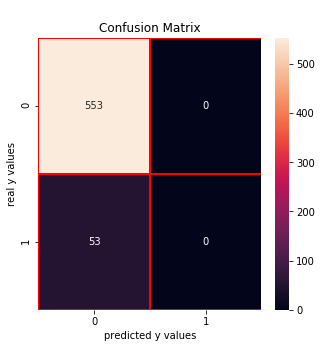

***** LOGISTIC REGRESSION  ALGORITHM:

Score for  LOGISTIC REGRESSION  train set: 0.9114730878186968
Score for  LOGISTIC REGRESSION  test set:  0.9125412541254125
Accuracy Score for  LOGISTIC REGRESSION 0.9125412541254125

AUC: 0.59


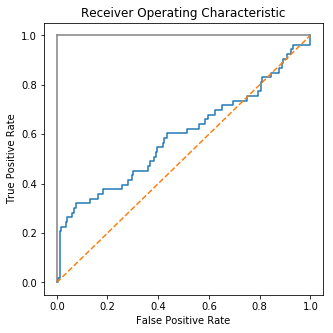

In [171]:
lr_model=ML_Algorithms(X_train, X_test, y_train, y_test, "LOGISTIC REGRESSION", LogisticRegression( random_state=42, max_iter=7))

In [61]:
print(classification_report(y_test,y_pred))
# herçekte hasta olanların %55 ini tahmin edebilmiş. Recall çok düşük

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       553
           1       0.00      0.00      0.00        53

    accuracy                           0.91       606
   macro avg       0.46      0.50      0.48       606
weighted avg       0.83      0.91      0.87       606



# PCA

In [ ]:
# PCA sürekli bağımsız değişkenlerin sayısını düşürmek için
# birbirine dik olan eigenvector ler oluşturulur

In [25]:
y=dff["bad"].values
# y=y.iloc[:,3].values
X=dff.drop(["bad"], axis=1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA() 
X_reduced_train=pca.fit_transform(scale(X_train))

np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)


array([ 15.09,  27.03,  35.4 ,  42.93,  49.84,  56.44,  62.99,  68.97,
        73.93,  78.86,  83.64,  88.24,  92.23,  95.99,  99.42, 100.  ,
       100.  , 100.  ])

In [26]:
x_reduced_train=pca.fit_transform(scale(X_train))
x_reduced_train[0:1,:]

array([[ 2.82919091e-01, -7.80197467e-01,  6.49959826e-01,
        -1.11814052e+00, -1.60607358e+00,  1.02604662e+00,
        -1.23597477e+00, -9.71716204e-03,  1.45677563e-01,
        -7.72449019e-01, -2.86750919e-01, -1.47803704e-01,
         6.67377812e-01, -2.44046249e-01, -7.97047198e-01,
         2.20483507e-01,  1.91214132e-15, -3.68438922e-17]])

In [28]:
pca=PCA(n_components=15)
x_reduced_train=pca.fit_transform(scale(X_train))
X_reduced_test=pca.transform(scale(X_test))


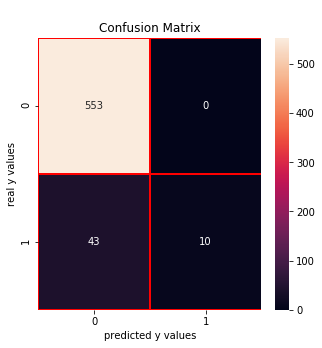

***** LOGISTIC REGRESSION  ALGORITHM:

Score for  LOGISTIC REGRESSION  train set: 0.9213881019830028
Score for  LOGISTIC REGRESSION  test set:  0.929042904290429
Accuracy Score for  LOGISTIC REGRESSION 0.929042904290429

AUC: 0.80


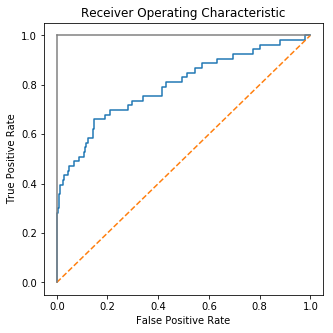

In [29]:
lr_tuned=ML_Algorithms(x_reduced_train, X_reduced_test, y_train, y_test, "LOGISTIC REGRESSION", LogisticRegression(C=0.05, random_state=42, max_iter=7))

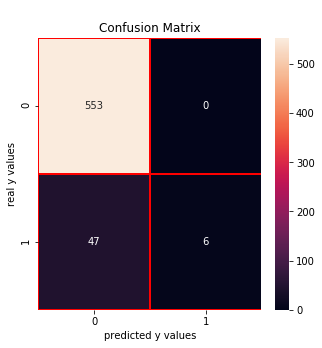

***** RANDOM FOREST CLASSIFIER  ALGORITHM:

Score for  RANDOM FOREST CLASSIFIER  train set: 0.9263456090651558
Score for  RANDOM FOREST CLASSIFIER  test set:  0.9224422442244224
Accuracy Score for  RANDOM FOREST CLASSIFIER 0.9224422442244224

AUC: 0.89


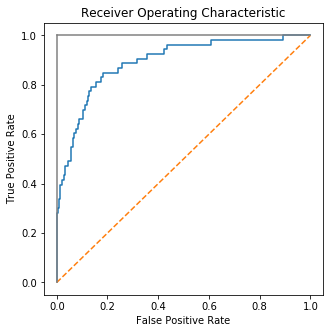

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=15,
                       min_samples_split=17, random_state=42)

In [30]:
#RF for test1, non-feature extraction
ML_Algorithms(x_reduced_train, X_reduced_test, y_train, y_test, "RANDOM FOREST CLASSIFIER", RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=17, min_samples_leaf=15, random_state=42))


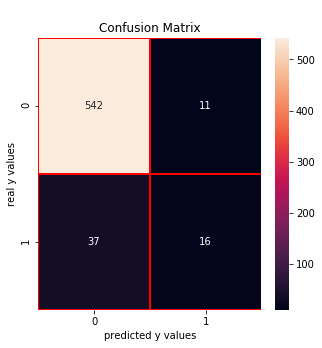

***** DECISION TREE CLASSIFIER  ALGORITHM:

Score for  DECISION TREE CLASSIFIER  train set: 0.943342776203966
Score for  DECISION TREE CLASSIFIER  test set:  0.9207920792079208
Accuracy Score for  DECISION TREE CLASSIFIER 0.9207920792079208

AUC: 0.83


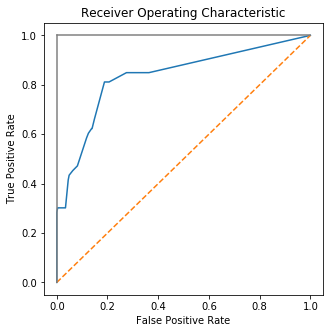

In [173]:
#DT for test1, non-feature extraction
dt_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "DECISION TREE CLASSIFIER", DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=18, min_samples_leaf=11, random_state=42))

In [25]:
cart=tree.DecisionTreeClassifier(max_leaf_nodes=6,min_samples_split=41,min_samples_leaf=20)
card_tuned=cart.fit(X_train,y_train)

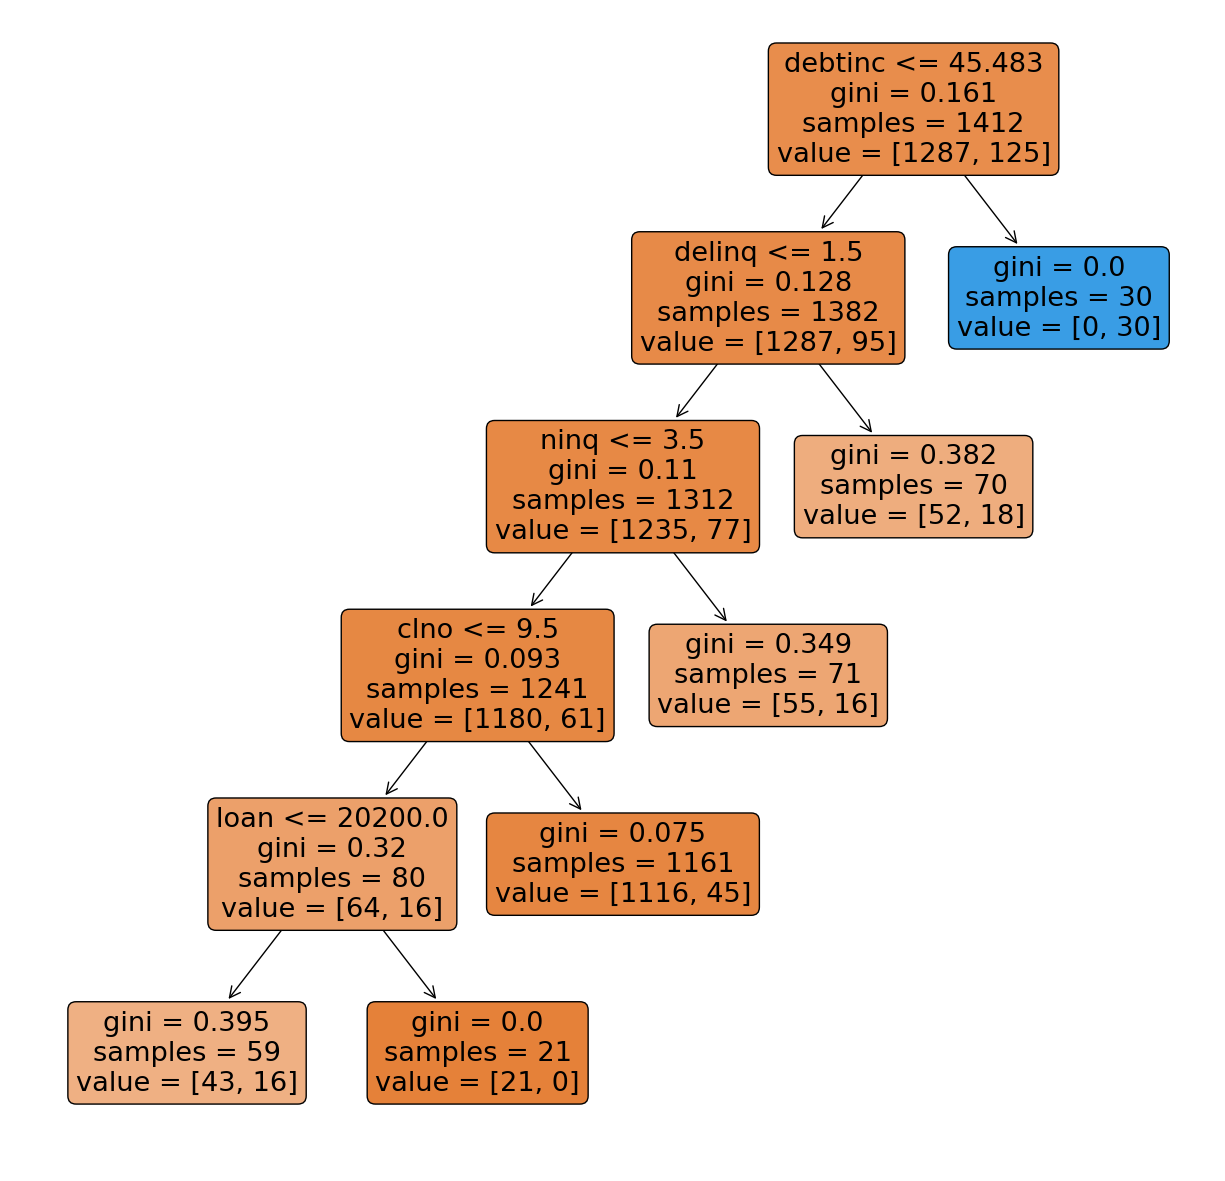

In [26]:
plt.figure(figsize=(15,15),dpi  = 100)
tree.plot_tree(card_tuned,feature_names= X_train.columns,rounded = True,
              filled = True,
              impurity = True);

# neural_network 

In [68]:
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.neural_network import MLPClassifier,MLPRegressor
mlp_model=MLPClassifier(hidden_layer_sizes=(100,20))
mlp_model.fit(X_train,y_train)

mlp_model.n_layers_
mlp_model.hidden_layer_sizes
y_pred=mlp_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


0.2957342487345479

In [69]:
mlp_params={'alpha':[0.1,0.01,0.02,0.005],
           'hidden_layer_sizes':[(20,20),(100,50,150),(300,200,150)],
           'activation':['relu','logistic']}


In [70]:
tuning(mlp_model,mlp_params)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.7min finished


En iyi parametreler: {'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (300, 200, 150)}


In [72]:
mlp_tuned=MLPClassifier(alpha=0.02,activation= 'relu',hidden_layer_sizes=(300, 200, 150))

In [74]:
mlp_tuned.fit(X_train,y_train)
y_pred=mlp_tuned.predict(X_test)

In [75]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.96       553
           1       1.00      0.02      0.04        53

    accuracy                           0.91       606
   macro avg       0.96      0.51      0.50       606
weighted avg       0.92      0.91      0.87       606



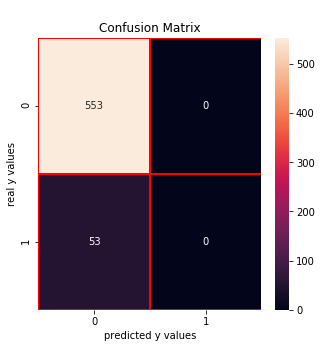

***** NN - MLPCLASSIFIER  ALGORITHM:

Score for  NN - MLPCLASSIFIER  train set: 0.9114730878186968
Score for  NN - MLPCLASSIFIER  test set:  0.9125412541254125
Accuracy Score for  NN - MLPCLASSIFIER 0.9125412541254125

AUC: 0.50


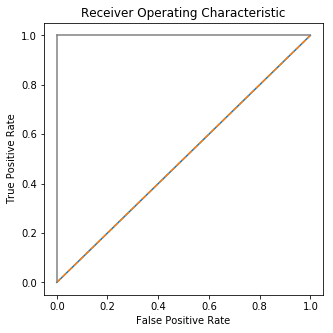

MLPClassifier(learning_rate_init=0.01, max_iter=20, power_t=1.7)

In [64]:
#MLP for test1, non-feature extraction
ML_Algorithms(X_train, X_test, y_train, y_test, "NN - MLPCLASSIFIER",MLPClassifier(hidden_layer_sizes=(100, ),alpha=0.0001,  learning_rate_init=0.01, power_t=1.7, max_iter=20))


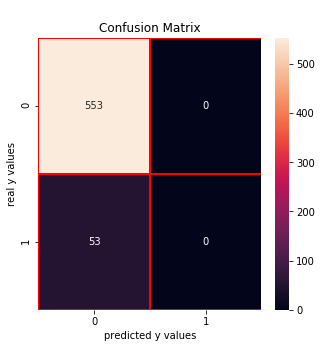

***** SVC  ALGORITHM:

Score for  SVC  train set: 0.9114730878186968
Score for  SVC  test set:  0.9125412541254125
Accuracy Score for  SVC 0.9125412541254125

AUC: 0.34


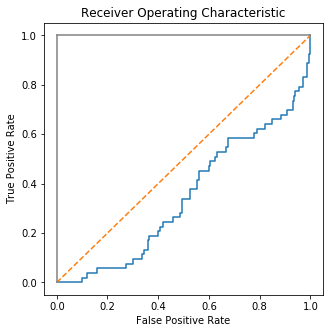

In [65]:
svc_model=ML_Algorithms(X_train, X_test, y_train, y_test, "SVC", SVC(probability=True))

In [26]:
svc_params = {"C" : [  0.1, 1, ],
                 "gamma" : [ 1, 5, ],
                 "kernel":['rbf','linear']}


In [ ]:
tuning(svc_model,svc_params)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 18.9min


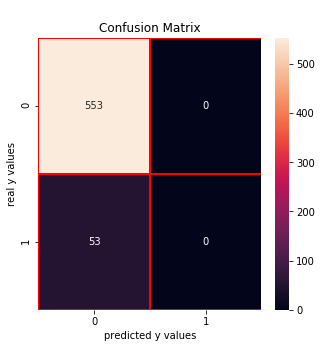

***** SVC  ALGORITHM:

Score for  SVC  train set: 0.9114730878186968
Score for  SVC  test set:  0.9125412541254125
Accuracy Score for  SVC 0.9125412541254125

AUC: 0.48


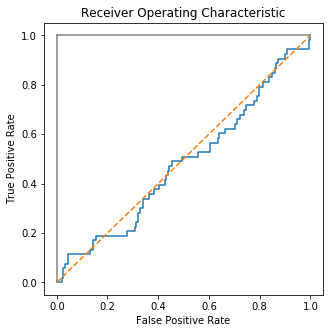

In [76]:
svc_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "SVC", SVC(C=1.2, kernel='poly', degree=2, random_state=42, probability=True))


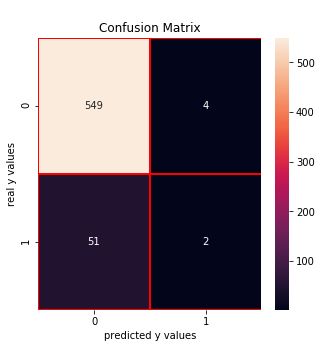

***** Bernoulli NB  ALGORITHM:

Score for  Bernoulli NB  train set: 0.9086402266288952
Score for  Bernoulli NB  test set:  0.9092409240924092
Accuracy Score for  Bernoulli NB 0.9092409240924092

AUC: 0.69


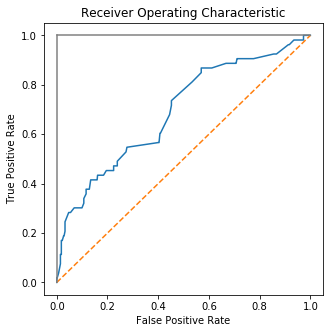

In [162]:
bnc_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "Bernoulli NB", BernoulliNB(alpha=0.01, binarize=0.1))

# Gaussian Naive Bayes

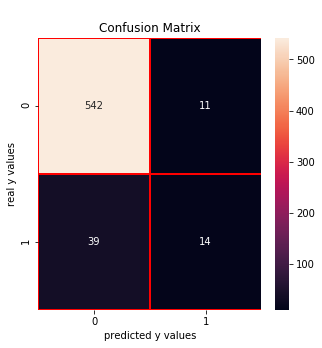

***** Gaussian Naive Bayes  ALGORITHM:

Score for  Gaussian Naive Bayes  train set: 0.910056657223796
Score for  Gaussian Naive Bayes  test set:  0.9174917491749175
Accuracy Score for  Gaussian Naive Bayes 0.9174917491749175

AUC: 0.82


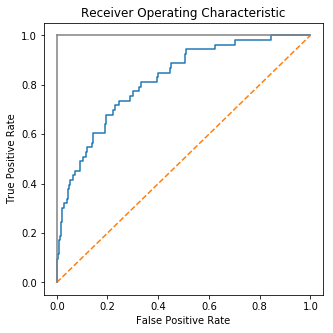

In [174]:
from sklearn.naive_bayes import GaussianNB
gnb_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "Gaussian Naive Bayes", GaussianNB())


# Gradient Boosting Classifier

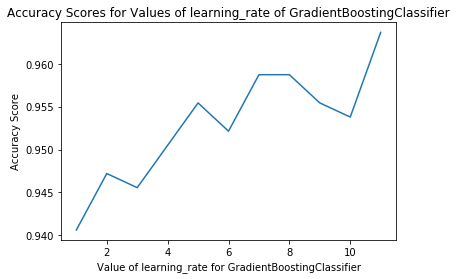

In [268]:
# experimenting with different n values

k_range = list(range(1,12))
scores = []
for k in k_range:
    knn = GradientBoostingClassifier(max_depth=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of learning_rate for GradientBoostingClassifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of learning_rate of GradientBoostingClassifier')
plt.show()

In [250]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)

gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [251]:
y_pred=gbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9455445544554455

In [257]:
gbm_params={"learning_rate":[0.01,0.1],
           "n_estimators":[10,20],         
            "max_depth": [3,5],
             "min_samples_split": [5,10]}



In [258]:
tuning(gbm_model,gbm_params)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s


En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 20}


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    5.3s finished


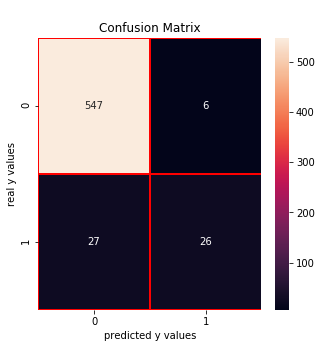

***** Gradient Boosting Classifier  ALGORITHM:
Recall Test Score of  Gradient Boosting Classifier     :  0.49056603773584906
Precision Test Score of  Gradient Boosting Classifier  :  0.8125
F1 Test Score of  Gradient Boosting Classifier         :  0.611764705882353

Score for  Gradient Boosting Classifier  train set: 0.9716713881019831
Score for  Gradient Boosting Classifier  test set:  0.9455445544554455
Accuracy Score for  Gradient Boosting Classifier 0.9455445544554455

AUC: 0.90


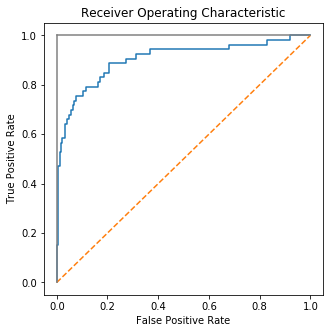

GradientBoostingClassifier()

In [260]:
ML_Algorithms(X_train, X_test, y_train, y_test, "Gradient Boosting Classifier", GradientBoostingClassifier())

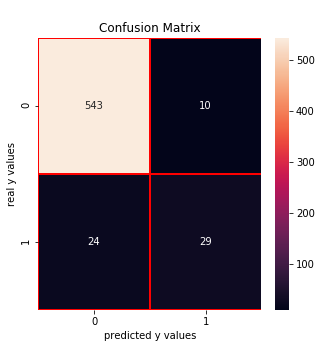

***** Gradient Boosting Classifier  ALGORITHM:

Score for  Gradient Boosting Classifier  train set: 0.9971671388101983
Score for  Gradient Boosting Classifier  test set:  0.9438943894389439
Accuracy Score for  Gradient Boosting Classifier 0.9438943894389439

AUC: 0.91


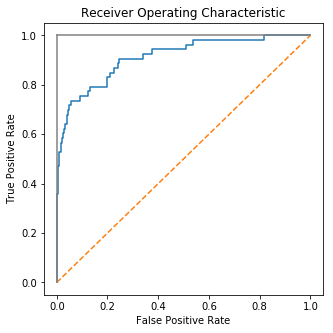

In [84]:
gbm_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "Gradient Boosting Classifier", GradientBoostingClassifier(n_estimators=25, learning_rate=0.3,min_samples_split=10,  max_depth=5, random_state=0))


# XGBClassifier

In [ ]:
xgb_model=XGBClassifier().fit(X_train,y_train)


In [ ]:
xgb_params={"learning_rate":[0.01,0.1,0.02,0.05],
           "n_estimators":[100,500,1000,2000], 
            "subsample":[0.6,0.8,1.0],
            "max_depth": [3,4,5,6],
             "min_child_weight": [0.8,0.9,1.0]}



In [ ]:
tuning

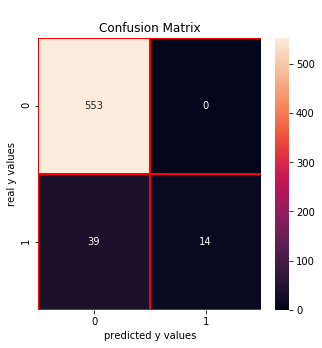

***** XGBClassifier  ALGORITHM:

Score for  XGBClassifier  train set: 0.9376770538243626
Score for  XGBClassifier  test set:  0.9356435643564357
Accuracy Score for  XGBClassifier 0.9356435643564357

AUC: 0.90


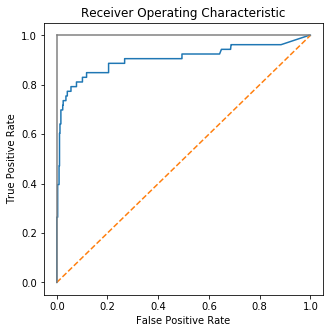

In [169]:
#GBC for test1, non-feature extraction
xgb_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "XGBClassifier", XGBClassifier(learning_rate=0.02,subsample=0.6,max_depth=4,min_child_weight=0.9,n_estimators=100))


# LGBMClassifier

In [ ]:
lgbm_model=LGBMClassifier().fit(X_train,y_train)

y_pred=lgbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
lgbm_params={"learning_rate":[0.01,0.1,0.02,0.05],
           "n_estimators":[500,1000,2000],
             "importance_type":["gains","split"],
            "subsample":[0.6,0.8,1.0],
            "max_depth": [4,5,6],
             "min_child_samples": [10,50]}



In [ ]:
tuning(lgbm_model,lgbm_params)

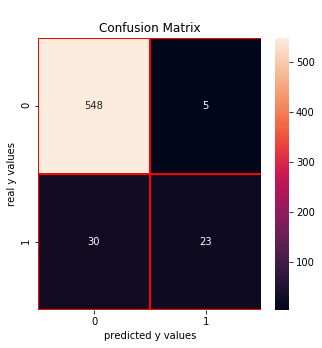

***** LGBMClassifier  ALGORITHM:

Score for  LGBMClassifier  train set: 1.0
Score for  LGBMClassifier  test set:  0.9422442244224423
Accuracy Score for  LGBMClassifier 0.9422442244224423

AUC: 0.90


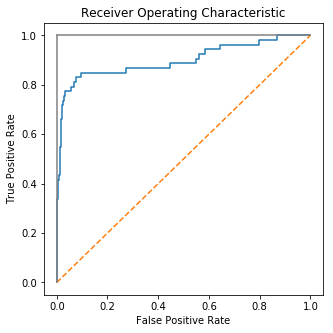

In [165]:
lgbm_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "LGBMClassifier", LGBMClassifier(learning_rate=0.05,importance_type='gains',subsample=0.6,max_depth=6,min_child_samples=50,n_estimators=2000))


# CatBoostClassifier

In [ ]:
catb_model=CatBoostClassifier().fit(X_train,y_train)

catb_model.get_all_params()

In [ ]:
ML_Algorithms(X_train, X_test, y_train, y_test, "CatBoostClassifier",CatBoostClassifier(learning_rate=0.01,grow_policy= 'Lossguide',max_leaves=20,depth=8,iterations=20))


In [ ]:
y_pred=catb_model.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
catb_params={"learning_rate":[0.01,0.1,0.05],
             "grow_policy":["Lossguide"],
           "iterations":[500,200], 
             "max_leaves":[20,30],
            "depth":[3,5,8]
}

In [ ]:
tuning(catb_model,catb_params)

0:	learn: 0.6861047	total: 102ms	remaining: 1.94s
1:	learn: 0.6794501	total: 105ms	remaining: 944ms
2:	learn: 0.6725540	total: 108ms	remaining: 613ms
3:	learn: 0.6661715	total: 112ms	remaining: 448ms
4:	learn: 0.6596490	total: 116ms	remaining: 347ms
5:	learn: 0.6536814	total: 119ms	remaining: 279ms
6:	learn: 0.6471937	total: 123ms	remaining: 228ms
7:	learn: 0.6409653	total: 126ms	remaining: 190ms
8:	learn: 0.6347076	total: 130ms	remaining: 158ms
9:	learn: 0.6286881	total: 132ms	remaining: 132ms
10:	learn: 0.6229101	total: 136ms	remaining: 111ms
11:	learn: 0.6170539	total: 140ms	remaining: 93.2ms
12:	learn: 0.6118549	total: 143ms	remaining: 77.2ms
13:	learn: 0.6060964	total: 147ms	remaining: 62.9ms
14:	learn: 0.6009344	total: 150ms	remaining: 50.2ms
15:	learn: 0.5954187	total: 154ms	remaining: 38.5ms
16:	learn: 0.5903926	total: 158ms	remaining: 27.8ms
17:	learn: 0.5855211	total: 162ms	remaining: 17.9ms
18:	learn: 0.5808152	total: 165ms	remaining: 8.7ms
19:	learn: 0.5759220	total: 168ms	

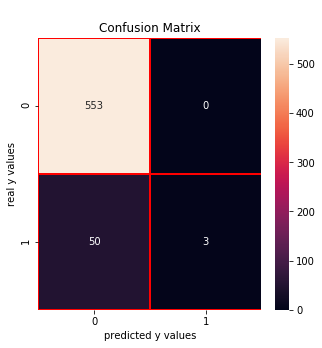

***** CatBoostClassifier  ALGORITHM:

Score for  CatBoostClassifier  train set: 0.9164305949008499
Score for  CatBoostClassifier  test set:  0.9174917491749175
Accuracy Score for  CatBoostClassifier 0.9174917491749175

AUC: 0.87


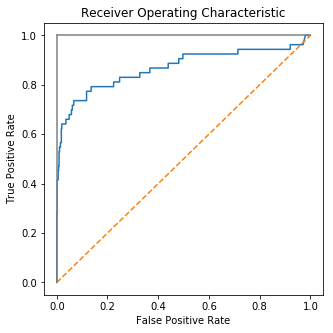

In [167]:
#GBC for test1, non-feature extraction
catb_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "CatBoostClassifier",CatBoostClassifier(learning_rate=0.01,grow_policy= 'Lossguide',max_leaves=20,depth=8,iterations=20))


# KNeighborsClassifier

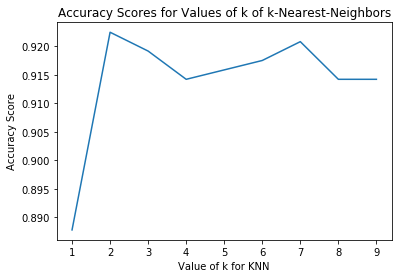

In [16]:
# experimenting with different n values
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

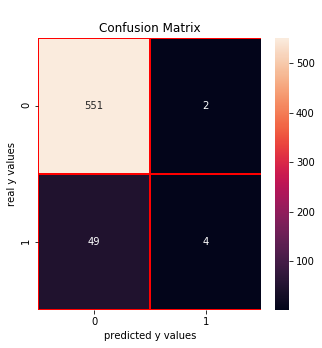

***** K-NEIGHBORS CLASSIFIER  ALGORITHM:
Recall Test Score of  K-NEIGHBORS CLASSIFIER     :  0.07547169811320754
Precision Test Score of  K-NEIGHBORS CLASSIFIER  :  0.6666666666666666
F1 Test Score of  K-NEIGHBORS CLASSIFIER         :  0.13559322033898305

Score for  K-NEIGHBORS CLASSIFIER  train set: 0.9150141643059491
Score for  K-NEIGHBORS CLASSIFIER  test set:  0.9158415841584159
Accuracy Score for  K-NEIGHBORS CLASSIFIER 0.9158415841584159

AUC: 0.67


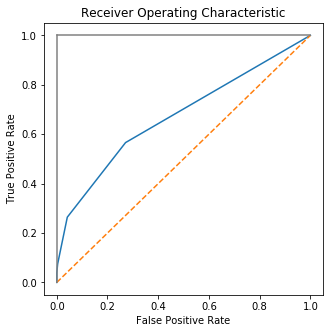

In [17]:
knn_model=ML_Algorithms(X_train, X_test, y_train, y_test, "K-NEIGHBORS CLASSIFIER", KNeighborsClassifier())

In [18]:
knn_params={"n_neighbors":np.arange(1,10,1),
            "metric":["minkowski","euclidean","manhattan"],
            "weights":['uniform','distance']
           }

In [20]:
tuning(knn_model,knn_params)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s


En iyi parametreler: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    5.1s finished


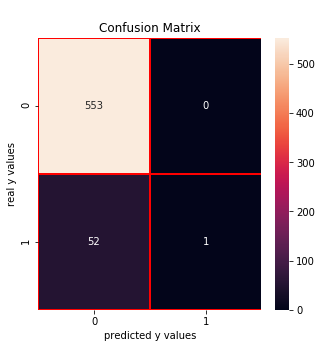

***** K-NEIGHBORS CLASSIFIER  ALGORITHM:

Score for  K-NEIGHBORS CLASSIFIER  train set: 0.9135977337110481
Score for  K-NEIGHBORS CLASSIFIER  test set:  0.9141914191419142
Accuracy Score for  K-NEIGHBORS CLASSIFIER 0.9141914191419142

AUC: 0.68


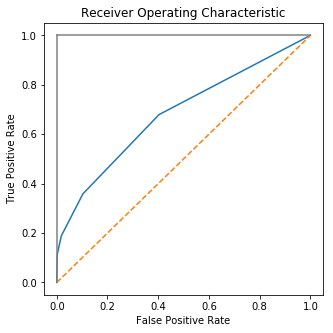

In [184]:
# #knn for test1, non-feature extraction
knn_tuned=ML_Algorithms(X_train, X_test, y_train, y_test, "K-NEIGHBORS CLASSIFIER", KNeighborsClassifier(n_neighbors=8,weights='uniform', metric='minkowski'))

                 Modeller   Accuracy
0  RandomForestClassifier  94.884488
0  DecisionTreeClassifier  92.079208
0      LogisticRegression  91.254125
0              GaussianNB  91.749175
0                     SVC  91.254125
0    KNeighborsClassifier  91.419142
0           MLPClassifier  91.419142
0           XGBClassifier  93.564356
0      CatBoostClassifier  91.749175
0          LGBMClassifier  94.224422
0           XGBClassifier  93.564356


Text(0.5, 1.0, 'modellerin doğruluk oranları')

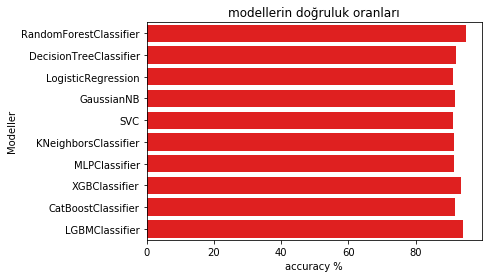

In [185]:
modeller=[rff_tuned,dt_tuned,lr_tuned,gnb_tuned,svc_tuned,knn_tuned,mlp_tuned,gbm_tuned,catb_tuned,lgbm_tuned,xgb_tuned]
sonuc=[]
sonuclar=pd.DataFrame(columns=["Modeller","Accuracy"])
for model in modeller:
    isimler=model.__class__.__name__
    y_pred=model.predict(X_test)
    dogruluk=accuracy_score(y_test,y_pred)
    sonuc=pd.DataFrame([[isimler,dogruluk*100]],columns=["Modeller","Accuracy"])
    sonuclar=sonuclar.append(sonuc)
print(sonuclar)
#     print(isimler+"  accuracy: {:.4%}".format(dogruluk))


sns.barplot(x="Accuracy",y='Modeller',data=sonuclar,color='r')

plt.xlabel('accuracy %')
plt.title("modellerin doğruluk oranları")

In [158]:
class data_classification():
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import  GridSearchCV

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score,roc_curve

    
    def __init__(self,X_train, X_test, y_train, y_test, model):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = model
        global rfc
        
    def conf_mtrx(self,y_test, y_pred, model): 
        from sklearn.metrics import confusion_matrix

        cm = confusion_matrix(y_test,y_pred)    
        f, ax = plt.subplots(figsize =(5,5))
        cm = confusion_matrix(y_test,y_pred)
        sns.heatmap(cm,annot = True, linewidths=0.5, linecolor="red",fmt = ".0f",ax=ax)#,cmap=plt.cm.RdPu
        plt.xlabel("predicted y values")
        plt.ylabel("real y values")
        plt.title("\nConfusion Matrix")
        plt.show()
        
    def plot_roc_curve(self,fpr, tpr):
        plt.figure(figsize=(5,5))
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr,tpr, label = roc_auc_score) 
        plt.plot([0,1],ls='--')
        plt.plot([0,0],[1,0],c='.5')
        plt.plot([1,1],c='.5')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    def rocc(self,model):
        y_probs = model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
        y_pred = np.where(y_probs > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

        fpr, tpr, thresholds = roc_curve(y_test, y_probs)

        probs = model.predict_proba(X_test)
        probs = probs[:, 1]
        return probs,fpr,tpr

    def classModels(self,model=None,alg_name=None):
        

        
        if model =='rfc':


            rfc = RandomForestClassifier()
            rfc.fit(self.X_train,self.y_train)
            y_pred = rfc.predict(self.X_test)
            self.conf_mtrx(y_test,y_pred,rfc)
            print('Random Forest' )
            print(classification_report(self.y_test,y_pred))
            probs,fpr,tpr=self.rocc(rfc)
            auc = roc_auc_score(y_test, probs)
            print('\033[1m'+ "AUC: %.2f" % auc+ '\033[0m')
            plot_roc_curve(fpr, tpr) 
            
        elif model =='dtc':

            dtc = DecisionTreeClassifier()
            dtc.fit(self.X_train,self.y_train)
            y_pred = dtc.predict(self.X_test)
            print('Decision Tree')
            print(classification_report(self.y_test,y_pred))
            probs,fpr,tpr=self.rocc(dtc)
            auc = roc_auc_score(y_test, probs)
            print('\033[1m'+ "AUC: %.2f" % auc+ '\033[0m')
            plot_roc_curve(fpr, tpr)
            
        elif model=='mlpc':
            mlpc = MLPClassifier()
            mlpc.fit(self.X_train,self.y_train)
            y_pred = mlpc.predict(self.X_test)
            print('MLP')
            print(classification_report(self.y_test,y_pred))
            probs,fpr,tpr=self.rocc(mlpc)
            auc = roc_auc_score(y_test, probs)
            print('\033[1m'+ "AUC: %.2f" % auc+ '\033[0m')
            plot_roc_curve(fpr, tpr)
            
#         return rfc
        
    def tuning(self,algorithm, params =model):
        
        
            if algorithm == 'rfc':
                model = RandomForestClassifier()
                grid_params=params

            elif algorithm == 'dtc':
                model = DecisionTreeClassifier()
                grid_params=params

            elif algorithm == 'mlpc':
                model = MLPClassifier()
                grid_params=params
                
            elif algorithm == 'lrc':
                model=LogisticRegression()
                grid_params=params

            elif algorithm =='gbc':
                model=GradientBoostingClassifier()
                grid_params=params

            elif algorithm =='lgbmc':
                model=LGBMClassifier()
                grid_params=params
            
            elif algorithm =='cbc':
                model=CatBoostClassifier()
                grid_params=params

            elif algorithm == 'knn':
                
                model=params
            elif algorithm =='xgbc':
                               
                model=XGBClassifier()
                grid_params=params

            elif algorithm =='gnbc':
                model=GaussianNB()
                grid_params=params
            elif algorithm=='svc':
                model=SVC()
                grid_params=params

            elif algorithm =='bnbc':
                model=BernoulliNB()
                grid_params=params

            else:
                print('Unknown method')
                
            model.fit(self.X_train,self.y_train)
            y_pred = model.predict(self.X_test)
            print(algorithm)
            print(classification_report(self.y_test,y_pred))
            probs,fpr,tpr=self.rocc(model)
            auc = roc_auc_score(y_test, probs)
            print('\033[1m'+ "AUC: %.2f" % auc+ '\033[0m')
            plot_roc_curve(fpr, tpr)

            return
        
    def tuning2(self,algorithm):
        
        if algorithm == 'rfc':
            model = RandomForestClassifier()
            grid_params = {"max_depth": [8,10,11,18],
                "max_features": [5,10],
                 "n_estimators": [5,10,50,],
                 "min_samples_split": [3,5,10],
                "criterion":['entropy','gini']}

        elif algorithm == 'dtc':
            model = DecisionTreeClassifier()
            grid_params = {"max_depth": range(1,10),
                "min_samples_split": list(range(2,50)),
                "criterion":['gini', 'entropy']}
            

        elif algorithm == 'mlpc':
            model = MLPClassifier()
            grid_params = {
                'alpha':[0.1,0.01,0.001,0.005,0.0001,0.00001],
                'hidden_layer_sizes': [(10,10,10),(45,50,60),(25,35,45),(15,15)],
                'solver': ['lbfgs','adam','sgd'],
                'activation': ['relu','logistic','tanh','identity']  }
        elif algorithm=='svc':
            model=SVC()
            grid_params = {"C" : [  0.1, 1, ],
             "gamma" : [ 1, 5, ],
             "kernel":['rbf','linear']}

        elif algorithm == 'lrc':
            model=LogisticRegression()
            grid_params = {"C" : [  0.1, 1, ],
            "max_iter":[2,5,7]}


        elif algorithm =='gbc':
            model=GradientBoostingClassifier()
            grid_params ={"learning_rate":[0.01,0.1],
       "n_estimators":[10,20],         
        "max_depth": [3,5],
         "min_samples_split": [5,10]}

        elif algorithm =='lgbmc':

            model=LGBMClassifier()
            grid_params ={"learning_rate":[0.01,0.1,0.02,0.05],
       "n_estimators":[500,1000,2000],
         "importance_type":["gains","split"],
        "subsample":[0.6,0.8,1.0],
        "max_depth": [4,5,6],
         "min_child_samples": [10,50]}

        elif algorithm =='cbc':
            model=CatBoostClassifier()               
            grid_params ={"learning_rate":[0.01,0.1,0.05],
         "grow_policy":["Lossguide"],
       "iterations":[500,200], 
         "max_leaves":[20,30],
        "depth":[3,5,8]}


        elif algorithm =='bnbc':
            model=BernoulliNB()
            grid_params = {
                'alpha':[0.1,0.01,0.001],
                'binarize':[0.1,0.01,0.001]}
        elif algorithm =='xgbc':

            model=XGBClassifier()
            grid_params = {"learning_rate":[0.01,0.1,0.02,0.05],
       "n_estimators":[100,500,1000,2000], 
        "subsample":[0.6,0.8,1.0],
        "max_depth": [3,4,5,6],
         "min_child_weight": [0.8,0.9,1.0]}


        elif algorithm == 'knn':
            model=KNeighborsClassifier()
            grid_params={"n_neighbors":np.arange(1,10,1),
            "metric":["minkowski","euclidean","manhattan"],
            "weights":['uniform','distance']
            }
        else:
            print('Check Algorithm')
            return

        model_cv = GridSearchCV(model, grid_params, cv=10, n_jobs=-1, verbose=2)
        model_cv_grid = model_cv.fit(self.X_train,self.y_train)

        print('\033[1m'+ "Best parameters: "'\033[0m'+str(model_cv_grid.best_params_))
       

In [81]:
data_classification=data_classification(X_train, X_test, y_train, y_test,"rfc")

In [82]:
data_classification.tuning('rfc')

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 610 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:   27.0s


Best parameters: {'criterion': 'gini', 'max_depth': 18, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   34.2s finished


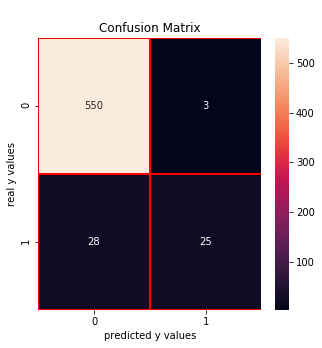

Random Forest
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       553
           1       0.89      0.47      0.62        53

    accuracy                           0.95       606
   macro avg       0.92      0.73      0.79       606
weighted avg       0.95      0.95      0.94       606

AUC: 0.95


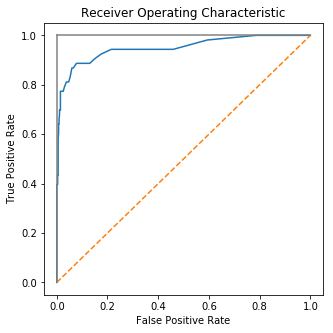

RandomForestClassifier()

In [245]:
data_classification.classModels('rfc','random forest')

In [131]:
data_classification=data_classification(X_train, X_test, y_train, y_test,"knn")

In [134]:
data_classification.tuning2('knn')

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 441 tasks      | elapsed:    6.0s


Best parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    6.3s finished


knn
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       553
           1       1.00      0.02      0.04        53

    accuracy                           0.91       606
   macro avg       0.96      0.51      0.50       606
weighted avg       0.92      0.91      0.87       606

AUC: 0.68


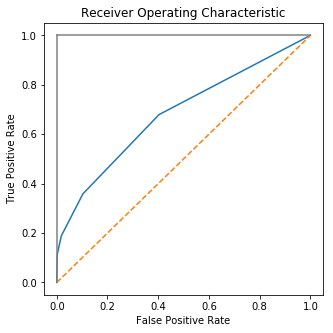

In [133]:
# data_classification.tuning('knn',['metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'])
data_classification.tuning('knn',KNeighborsClassifier(n_neighbors=8,weights='uniform', metric='minkowski'))

In [159]:
data_classification=data_classification(X_train, X_test, y_train, y_test,"dtc")

In [160]:
model=data_classification.tuning2('dtc')

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 8548 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:   27.4s finished


Best parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}


rfc
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       553
           1       0.92      0.43      0.59        53

    accuracy                           0.95       606
   macro avg       0.93      0.72      0.78       606
weighted avg       0.95      0.95      0.94       606

AUC: 0.95


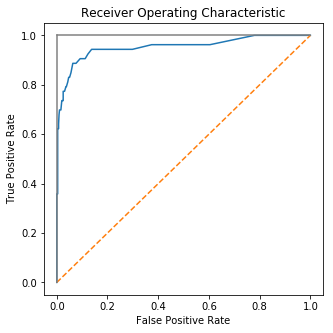

In [161]:
data_classification.tuning('rfc',RandomForestClassifier(criterion='gini',max_depth=6,min_samples_split=2))